In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [23]:
tf.__version__

'2.15.0'

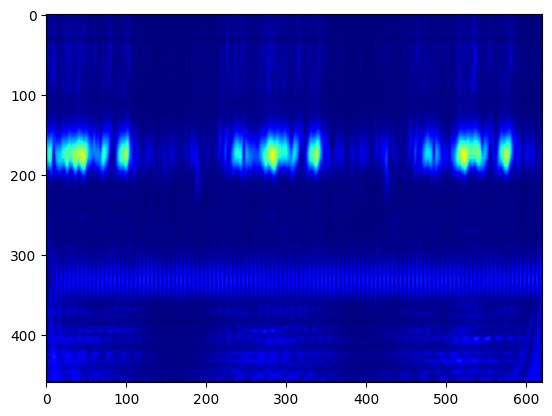

In [24]:

file_path = 'CWTImage/CWTimg0_2inch_c.png'

# Load the image
img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x1, y1 = 125, 75  # 左上角坐标
x2, y2 = 745, 535  # 右下角坐标
img = img[y1:y2, x1:x2]  # 裁剪坐标为[y0:y1, x0:x1]
plt.imshow(img)

In [25]:
img.shape

(460, 620, 3)

In [26]:
from collections import Counter


pic = []
label = []

cnt = 0


for file_name in os.listdir('CWTImage'):
    cnt += 1
    if cnt > 1200:
        break
    img = cv2.imread('CWTImage/' + file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pic.append(img)
    label.append(file_name.split('_')[2].split('.')[0])

    
label_count = Counter(label)
print(label_count)




Counter({'s': 501, 'u': 330, 'c': 249, 'i': 120})


In [28]:
label = np.where(label == 's', 0, label)
label = np.where(label == 'u', 1, label)
label = np.where(label == 'c', 2, label)
label = np.where(label == 'i', 3, label)
label.astype(int)

array([2, 0, 0, ..., 1, 1, 1])

In [29]:
label = np.array(label, dtype=int)


In [30]:
# shuffle the data
pic = np.array(pic)
label = np.array(label)
idx = np.random.permutation(len(pic))
pic, label = pic[idx], label[idx]
# split the data
from sklearn.model_selection import train_test_split



# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(pic, label, test_size=0.2, random_state=42)

# Split train set into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Normalize the data
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0



In [31]:
x_train[3]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.48627451],
        [0.        , 0.        , 0.55294118],
        ...,
        [0.        , 0.        , 0.49803922],
        [0.        , 0.        , 0.49803922],
        [0.        , 0.        , 0.48627451]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.48627451],
        [0.        , 0.        , 0.55294118],
        ...,
        [0.        , 0.        , 0.51764706],
        [0.        , 0.        , 0.51764706],
        [0.        , 0.        , 0.48627451]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.48627451],
        [0.        , 0.        , 0.56862745],
        ...,
        [0.        , 0.        , 0.51764706],
        [0.        , 0.        , 0.51764706],
        [0.        , 0.        , 0.48627451]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.27843137, 0.94509804],
        [0.        , 0

In [32]:
type(y_train[3])

numpy.int32

In [33]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4), activation='relu', input_shape=(460, 620, 3)),
    tf.keras.layers.MaxPooling2D((4, 4)),
    tf.keras.layers.Conv2D(16, (4, 4), activation='relu'),
    tf.keras.layers.MaxPooling2D((4, 4)),
    tf.keras.layers.Conv2D(8, (4, 4), activation='relu'),
    tf.keras.layers.MaxPooling2D((4, 4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4,activation='softmax')
])

In [34]:
# Compile the model
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32 , validation_data=(x_val, y_val))

Epoch 1/50
24/24 [==============================] - 35s 1s/step - loss: 1.3641 - accuracy: 0.3750 - val_loss: 1.0139 - val_accuracy: 0.4531
Epoch 2/50
24/24 [==============================] - 25s 1s/step - loss: 1.0208 - accuracy: 0.5039 - val_loss: 0.8513 - val_accuracy: 0.6458
Epoch 3/50
24/24 [==============================] - 24s 1s/step - loss: 0.8573 - accuracy: 0.5898 - val_loss: 0.8448 - val_accuracy: 0.6823
Epoch 4/50
24/24 [==============================] - 24s 1s/step - loss: 0.8262 - accuracy: 0.6250 - val_loss: 0.7279 - val_accuracy: 0.7031
Epoch 5/50
24/24 [==============================] - 24s 1s/step - loss: 0.8159 - accuracy: 0.6484 - val_loss: 0.8091 - val_accuracy: 0.7396
Epoch 6/50
24/24 [==============================] - 24s 987ms/step - loss: 0.7675 - accuracy: 0.6953 - val_loss: 0.6950 - val_accuracy: 0.7135
Epoch 7/50
24/24 [==============================] - 24s 1s/step - loss: 0.7819 - accuracy: 0.6875 - val_loss: 0.6689 - val_accuracy: 0.7135
Epoch 8/50
24/24 

In [36]:
# Evaluate the model
model.evaluate(x_test, y_test)


8/8 [==============================] - 3s 293ms/step - loss: 0.5678 - accuracy: 0.8042


[0.5677992105484009, 0.8041666746139526]

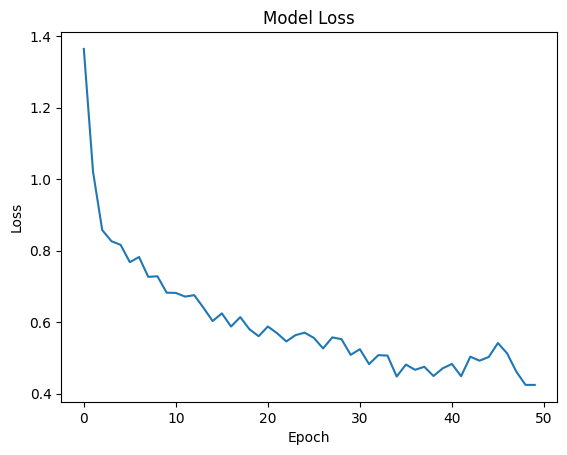

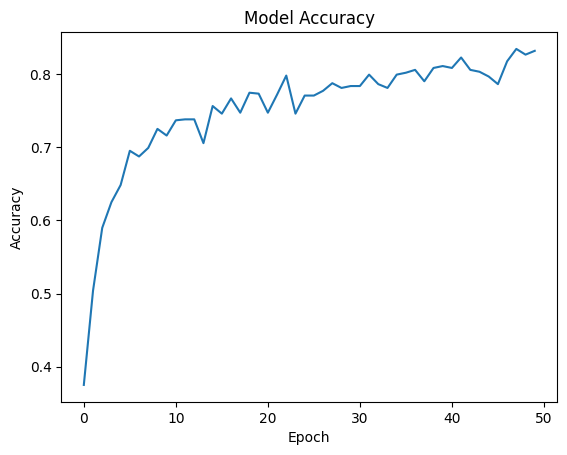

In [38]:


# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
